In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

df = pd.read_csv("delhi-weather-aqi-2025.csv")

df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52560 entries, 0 to 52559
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date_ist        52560 non-null  object 
 1   time_ist        52560 non-null  object 
 2   location        52560 non-null  object 
 3   lat             52560 non-null  float64
 4   lon             52560 non-null  float64
 5   temp_c          52560 non-null  float64
 6   humidity        52560 non-null  int64  
 7   pressure_mb     52560 non-null  float64
 8   windspeed_kph   52560 non-null  float64
 9   condition_text  52560 non-null  object 
 10  description     52560 non-null  object 
 11  aqi_index       52560 non-null  int64  
 12  pm2_5           52560 non-null  float64
 13  pm10            52560 non-null  float64
 14  co              52560 non-null  int64  
 15  no2             52560 non-null  float64
dtypes: float64(8), int64(3), object(5)
memory usage: 6.4+ MB


,lat,lon,temp_c,humidity,pressure_mb,windspeed_kph,aqi_index,pm2_5,pm10,co,no2
count,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000
mean,28.608850,77.174567,25.024406,62.285940,983.162635,6.565820,287.364212,89.542432,300.462700,863.844273,35.442757
std,0.058927,0.096519,7.618231,23.454666,6.688582,3.478066,327.979524,55.363812,412.782899,600.845140,28.978905
min,28.527300,77.049400,5.700000,5.000000,966.100000,0.000000,56.000000,6.000000,6.100000,146.000000,1.700000
25%,28.556200,77.100000,19.500000,44.000000,977.500000,4.000000,152.000000,51.100000,80.600000,464.000000,14.900000
50%,28.609300,77.160100,26.500000,65.000000,983.400000,6.000000,170.000000,76.400000,151.800000,664.000000,26.900000
75%,28.646900,77.261800,30.500000,82.000000,988.900000,8.700000,238.000000,110.400000,325.000000,1078.000000,47.100000
max,28.704100,77.316000,43.800000,100.000000,998.800000,27.100000,2742.000000,443.300000,3263.400000,7432.000000,220.100000


In [4]:
df["datetime"] = pd.to_datetime(
    df["date_ist"] + " " + df["time_ist"],
    dayfirst=True
)

df = df.sort_values(["location", "datetime"]).reset_index(drop=True)

# Missing values
df.isnull().sum()

date_ist          0
time_ist          0
location          0
lat               0
lon               0
temp_c            0
humidity          0
pressure_mb       0
windspeed_kph     0
condition_text    0
description       0
aqi_index         0
pm2_5             0
pm10              0
co                0
no2               0
datetime          0
dtype: int64

/var/folders/41/v432s3710md0b49y0m1xkk2c0000gn/T/ipykernel_9112/1904466118.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x="hour", y="aqi_index", ci=None)


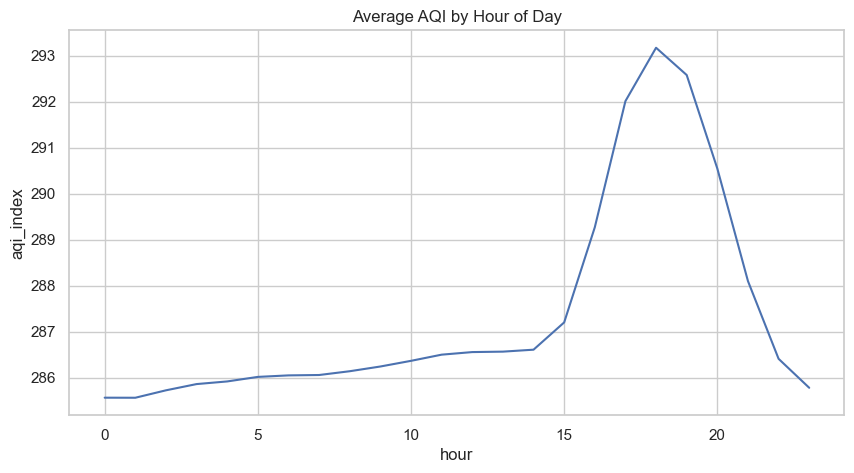

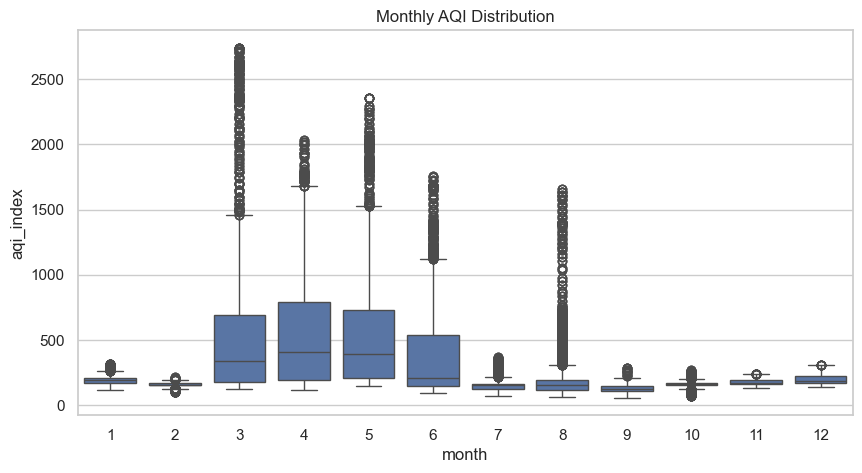

In [5]:
# =========================
# Temporal AQI Analysis
# =========================

df["hour"] = df["datetime"].dt.hour
df["month"] = df["datetime"].dt.month

plt.figure(figsize=(10,5))
sns.lineplot(data=df, x="hour", y="aqi_index", ci=None)
plt.title("Average AQI by Hour of Day")
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(data=df, x="month", y="aqi_index")
plt.title("Monthly AQI Distribution")
plt.show()

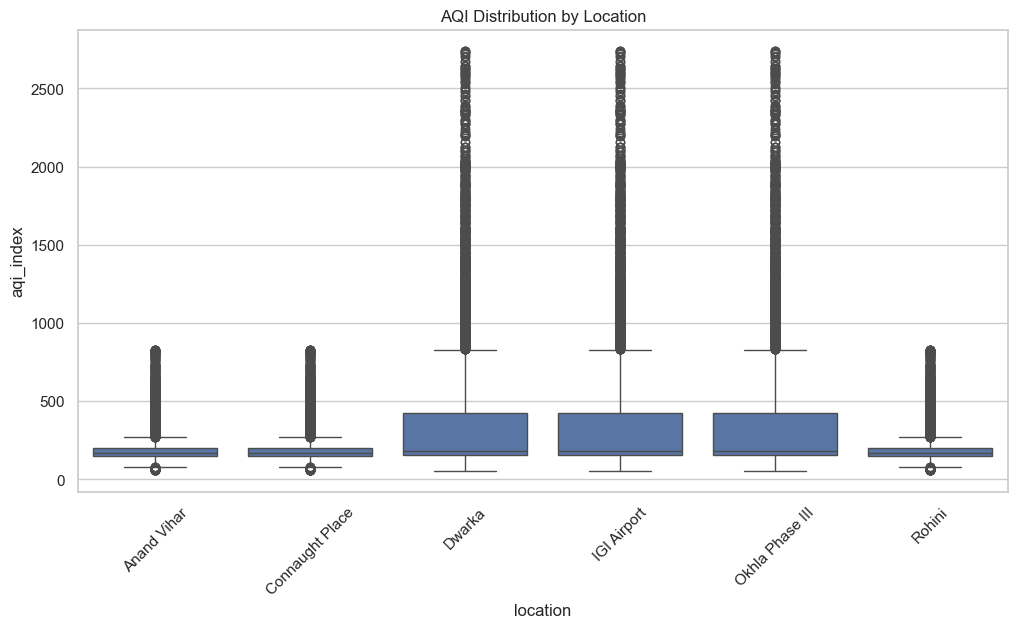

In [6]:
# =========================
# Location-wise AQI
# =========================

plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="location", y="aqi_index")
plt.xticks(rotation=45)
plt.title("AQI Distribution by Location")
plt.show()

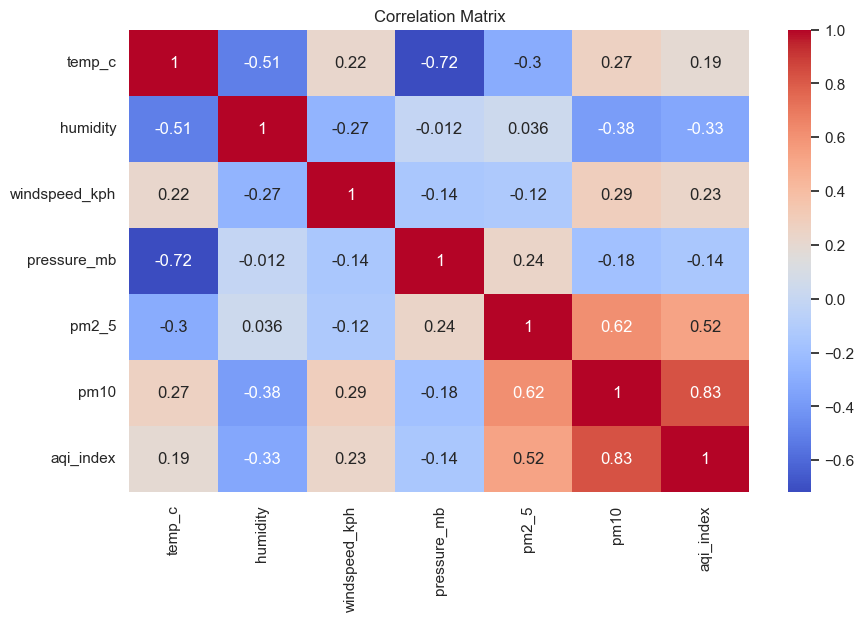

In [7]:
# =========================
# Weather vs AQI
# =========================

features = ["temp_c", "humidity", "windspeed_kph", "pressure_mb", "pm2_5", "pm10"]

plt.figure(figsize=(10,6))
sns.heatmap(df[features + ["aqi_index"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()